<a href="https://colab.research.google.com/github/y05f/AI-Machine-Learning-et-Deep-Learning/blob/main/Cats_v_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile, rmtree

In [3]:
#rmtree('/tmp/cats-v-dogs')


In [5]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"
local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2022-06-18 22:45:33--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.117.232.107, 2600:1409:9800:686::e59, 2600:1409:9800:693::e59
Connecting to download.microsoft.com (download.microsoft.com)|104.117.232.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M   285MB/s    in 2.8s    

2022-06-18 22:45:35 (285 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



In [6]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))
print(os.listdir('/tmp'))
print(os.listdir('/tmp'))

# 12501
# 12501

12501
12501
['pyright-142-cRJgd37HyZG0', 'pyright-110-9jJfCL79Hno2', 'initgoogle_syslog_dir.0', 'PetImages', 'pyright-142-0HOxWRPKXpyJ', 'dap_multiplexer.258f3a5ec4cd.root.log.INFO.20220618-221751.56', 'readme[1].txt', 'python-languageserver-cancellation', 'pyright-110-MEwyy3Xznkp4', 'debugger_26utefpl7d', 'CDLA-Permissive-2.0.pdf', 'cats-and-dogs.zip', 'dap_multiplexer.INFO']
['pyright-142-cRJgd37HyZG0', 'pyright-110-9jJfCL79Hno2', 'initgoogle_syslog_dir.0', 'PetImages', 'pyright-142-0HOxWRPKXpyJ', 'dap_multiplexer.258f3a5ec4cd.root.log.INFO.20220618-221751.56', 'readme[1].txt', 'python-languageserver-cancellation', 'pyright-110-MEwyy3Xznkp4', 'debugger_26utefpl7d', 'CDLA-Permissive-2.0.pdf', 'cats-and-dogs.zip', 'dap_multiplexer.INFO']


In [7]:
try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass

In [8]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  files_list = os.listdir(SOURCE)
  files_list = random.sample(files_list, len(files_list))
  for i in range(len(files_list)):
    if os.path.getsize(os.path.join(SOURCE,files_list[i])) == 0 :
      print(files_list[i],"is zero length, so ignoring")
    else:
      if i <= len(files_list) * 0.9 :
        copyfile(os.path.join(SOURCE,files_list[i]),os.path.join(TRAINING,files_list[i]))
      else :
        copyfile(os.path.join(SOURCE,files_list[i]),os.path.join(TESTING,files_list[i]))


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

666.jpg is zero length, so ignoring
11702.jpg is zero length, so ignoring


In [9]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

# 11250
# 11250
# 1250
# 1250

11250
11250
1250
1250


# Model

In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [11]:
TRAINING_DIR = "/tmp/cats-v-dogs/training"
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,  
        target_size=(150, 150),  
        batch_size=20,
        class_mode='binary')

VALIDATION_DIR = "/tmp/cats-v-dogs/testing"
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [12]:
history = model.fit(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator)



Epoch 1/15
 170/1125 [===>..........................] - ETA: 2:24 - loss: 0.7021 - accuracy: 0.5038

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

1125/1125 [==============================] - 199s 165ms/step - loss: 0.6823 - accuracy: 0.5543 - val_loss: 0.6587 - val_accuracy: 0.6124
Epoch 2/15
1125/1125 [==============================] - 179s 159ms/step - loss: 0.6298 - accuracy: 0.6383 - val_loss: 0.5804 - val_accuracy: 0.6916
Epoch 3/15
1125/1125 [==============================] - 178s 158ms/step - loss: 0.6003 - accuracy: 0.6705 - val_loss: 0.5496 - val_accuracy: 0.7092
Epoch 4/15
1125/1125 [==============================] - 177s 157ms/step - loss: 0.5747 - accuracy: 0.6915 - val_loss: 0.5454 - val_accuracy: 0.7132
Epoch 5/15
1125/1125 [==============================] - 176s 157ms/step - loss: 0.5572 - accuracy: 0.7117 - val_loss: 0.5086 - val_accuracy: 0.7452
Epoch 6/15
1125/1125 [==============================] - 176s 156ms/step - loss: 0.5441 - accuracy: 0.7212 - val_loss: 0.5097 - val_accuracy: 0.7680
Epoch 7/15
1125/1125 [==============================] - 177s 157ms/step - loss: 0.5320 - accuracy: 0.7294 - val_loss: 0.488

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

#model.save_weights("/content/gdrive/MyDrive/catVdogs-Weights16juin2022")
model.load_weights("/content/gdrive/MyDrive/catVdogs-Weights16juin2022")


Mounted at /content/gdrive


In [14]:
model.save("/content/gdrive/MyDrive/catsVdogsModel18juin2022.h5")

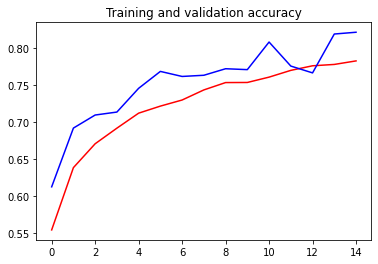

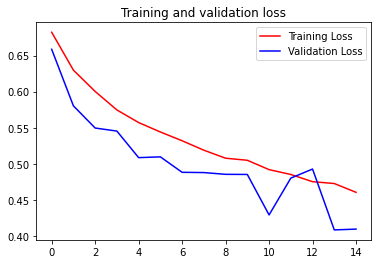

In [15]:

%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 


plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()


plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend()

plt.title('Training and validation loss')
plt.show()



# Test

In [5]:

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes)

  if classes[0]>0.5:
    print(fn + " is a dog, (output: "+str(classes[0])+")")
  else:
    print(fn + " is a cat, (output:" +str(classes[0])+")")

Saving cat1.jpg to cat1 (1).jpg
Saving dog2.jpg to dog2.jpg
[[3.7217738e-32]]
cat1.jpg is a cat, (output:[3.7217738e-32])
[[1.]]
dog2.jpg is a dog, (output: [1.])
